In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
tdf = pd.read_csv("test.csv")
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [3]:
df.shape, tdf.shape

((50882, 14), (21805, 13))

In [4]:
df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [5]:
df.isnull().sum() /df.shape[0] * 100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [6]:
tdf.isnull().sum() /tdf.shape[0] * 100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

In [7]:
df.nunique()

ID                         50882
City_Code                     36
Region_Code                 5316
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
Reco_Policy_Cat               22
Reco_Policy_Premium         6977
Response                       2
dtype: int64

In [8]:
tdf.nunique()

ID                         21805
City_Code                     36
Region_Code                 4694
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
Reco_Policy_Cat               22
Reco_Policy_Premium         5226
dtype: int64

In [9]:
target_col = "Response"
cat_cols = ['City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat']
reg_cols = ['Reco_Policy_Premium']

Text(0.5, 1.0, 'City Code')

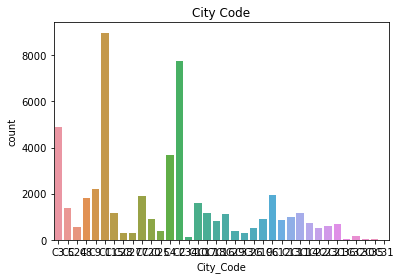

In [10]:

sns.countplot("City_Code", data=df, ).set_title("City Code")

Text(0.5, 1.0, 'Region_Code')

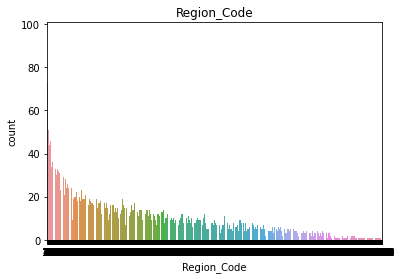

In [11]:

sns.countplot("Region_Code", data=df, ).set_title("Region_Code")

Text(0.5, 1.0, 'Accomodation_Type')

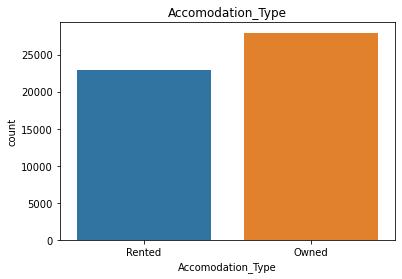

In [12]:

sns.countplot("Accomodation_Type", data=df, ).set_title("Accomodation_Type")

Text(0.5, 1.0, 'Reco_Insurance_Type')

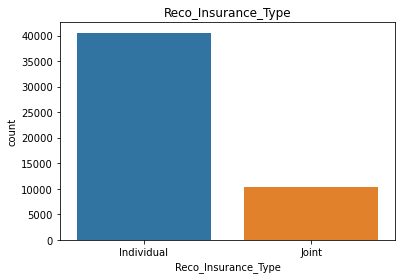

In [13]:

sns.countplot("Reco_Insurance_Type", data=df, ).set_title("Reco_Insurance_Type")

Text(0.5, 1.0, 'Health Indicator  ')

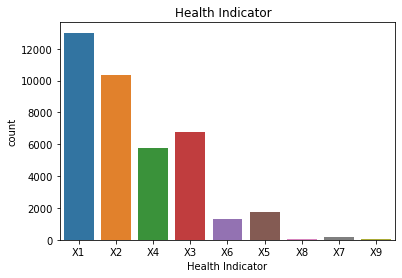

In [14]:

sns.countplot("Health Indicator", data=df, ).set_title("Health Indicator  ")

In [15]:
df["Health Indicator"].value_counts(dropna=False)

X1     13010
NaN    11691
X2     10332
X3      6762
X4      5743
X5      1727
X6      1280
X7       196
X8        78
X9        63
Name: Health Indicator, dtype: int64

In [16]:
df["Holding_Policy_Duration"].value_counts(dropna=False)

NaN     20251
1.0      4499
14+      4335
2.0      4260
3.0      3586
4.0      2771
5.0      2362
6.0      1894
7.0      1645
8.0      1316
9.0      1114
10.0      813
11.0      546
12.0      513
13.0      511
14.0      466
Name: Holding_Policy_Duration, dtype: int64

In [17]:
df["Holding_Policy_Type"].value_counts(dropna=False)

NaN    20251
3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64